## Goal:  Choose stocks to build  Portfolio

<br> 1. Perform Clustering on stocks and derive 1 stock per each cluster with highest Market Cap. 
<br> 2. Add additionally for each stock the least correlated one based on Correlation Matrix
<br> 3. Define cointegrated stock pairs if they are exist

In [351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sklearn
import pickle


from sklearn.cluster import KMeans
from math import sqrt
import  pylab as pl
import sys, os

# enable pandas to show all the column
pd.set_option('display.max_columns', 500)

1. Take last 120 days of data
2. Calculate covariance and correlation between each stock 
3. Calculate the distance for correlation matrix
4. ... 



## Read data

In [342]:
df = pd.read_pickle('data/raw_data.pkl')

In [343]:
df.head()

,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,assetsnc,assetturnover,bvps,capex,cashneq,cashnequsd,cor,consolinc,currentratio,de,debt,debtc,debtnc,debtusd,deferredrev,depamor,deposits,divyield,dps,ebit,ebitda,ebitdamargin,ebitdausd,ebitusd,ebt,eps,epsdil,epsusd,equity,equityavg,equityusd,ev,evebit,evebitda,fcf,fcfps,fxusd,gp,grossmargin,intangibles,intexp,invcap,invcapavg,inventory,investments,investmentsc,investmentsnc,liabilities,liabilitiesc,liabilitiesnc,marketcap,ncf,ncfbus,ncfcommon,ncfdebt,ncfdiv,ncff,ncfi,ncfinv,ncfo,ncfx,netinc,netinccmn,netinccmnusd,netincdis,netincnci,netmargin,opex,opinc,payables,payoutratio,pb,pe,pe1,ppnenet,prefdivis,price,ps,ps1,receivables,retearn,revenue,revenueusd,rnd,roa,roe,roic,ros,sbcomp,sgna,sharefactor,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital,Open,High,Low,Close,Adj Close,Volume
57078,NKE,MRY,2011-12-31,2011-05-31,2011-05-31,2022-01-06,95000000.0,1.499800e+10,1.449775e+10,1.129700e+10,3.701000e+09,1.388,5.19,-431000000.0,1.955000e+09,1.955000e+09,1.091500e+10,2.133000e+09,2.854,0.524,663000000.0,387000000.0,276000000.0,663000000.0,0.0,335000000.0,0.0,0.014,0.29,2.827000e+09,3.162000e+09,0.157,3.162000e+09,2.827000e+09,2.823000e+09,1.14,1.12,1.14,9.843000e+09,9.838500e+09,9.843000e+09,3.852127e+10,14.0,12.183,1.381000e+09,0.728,1.0,9.202000e+09,0.457,692000000.0,4000000.0,9.056000e+09,9.053000e+09,2.715000e+09,2.583000e+09,2.583000e+09,0.0,5.155000e+09,3.958000e+09,1.197000e+09,4.004027e+10,-1.124000e+09,0.0,-1.514000e+09,33000000.0,-555000000.0,-1.972000e+09,-1.021000e+09,-560000000.0,1.812000e+09,57000000.0,2.133000e+09,2.133000e+09,2.133000e+09,39000000.0,0.0,0.106,6.361000e+09,2.841000e+09,1.469000e+09,0.254,4.068,18.772,18.52,2.115000e+09,0.0,21.113,1.99,1.99,3.138000e+09,5.801000e+09,2.011700e+10,2.011700e+10,0.0,0.147,0.217,0.312,0.141,105000000.0,6.361000e+09,1.0,1.896520e+09,1.896520e+09,NaN,10.607,1.430600e+10,1.206000e+09,690000000.0,1.038000e+09,7.543,7.339000e+09,21.209999,21.237499,20.955000,21.112499,18.571480,8879200.0
57077,NKE,MRY,2011-12-31,2011-05-31,2011-06-01,2022-01-06,95000000.0,1.499800e+10,1.449775e+10,1.129700e+10,3.701000e+09,1.388,5.19,-431000000.0,1.955000e+09,1.955000e+09,1.091500e+10,2.133000e+09,2.854,0.524,663000000.0,387000000.0,276000000.0,663000000.0,0.0,335000000.0,0.0,0.014,0.29,2.827000e+09,3.162000e+09,0.157,3.162000e+09,2.827000e+09,2.823000e+09,1.14,1.12,1.14,9.843000e+09,9.838500e+09,9.843000e+09,3.852127e+10,14.0,12.183,1.381000e+09,0.728,1.0,9.202000e+09,0.457,692000000.0,4000000.0,9.056000e+09,9.053000e+09,2.715000e+09,2.583000e+09,2.583000e+09,0.0,5.155000e+09,3.958000e+09,1.197000e+09,4.004027e+10,-1.124000e+09,0.0,-1.514000e+09,33000000.0,-555000000.0,-1.972000e+09,-1.021000e+09,-560000000.0,1.812000e+09,57000000.0,2.133000e+09,2.133000e+09,2.133000e+09,39000000.0,0.0,0.106,6.361000e+09,2.841000e+09,1.469000e+09,0.254,4.068,18.772,18.52,2.115000e+09,0.0,21.113,1.99,1.99,3.138000e+09,5.801000e+09,2.011700e+10,2.011700e+10,0.0,0.147,0.217,0.312,0.141,105000000.0,6.361000e+09,1.0,1.896520e+09,1.896520e+09,NaN,10.607,1.430600e+10,1.206000e+09,690000000.0,1.038000e+09,7.543,7.339000e+09,21.084999,21.180000,20.520000,20.537500,18.065689,10124800.0
57076,NKE,MRY,2011-12-31,2011-05-31,2011-06-02,2022-01-06,95000000.0,1.499800e+10,1.449775e+10,1.129700e+10,3.701000e+09,1.388,5.19,-431000000.0,1.955000e+09,1.955000e+09,1.091500e+10,2.133000e+09,2.854,0.524,663000000.0,387000000.0,276000000.0,663000000.0,0.0,335000000.0,0.0,0.014,0.29,2.827000e+09,3.162000e+09,0.157,3.162000e+09,2.827000e+09,2.823000e+09,1.14,1.12,1.14,9.843000e+09,9.838500e+09,9.843000e+09,3.852127e+10,14.0,12.183,1.381000e+09,0.728,1.0,9.202000e+09,0.457,692000000.0,4000000.0,9.056000e+09,9.053000e+09,2.715000e+09,2.583000e+09,2.583000e+09,0.0,5.155000e+09,3.958000e+09,1.197000e+09,4.004027e+10,-1.124000e+09,0.0,-1.514000e+09,33000000.0,-555000000.0,-1.972000e+09,-1.021000e+0

## Select last X days

In [344]:
history_data = {}

for tick in df.ticker.dropna().unique():
    tmp = df[(df.reportperiod >= pd.Timestamp(2020,6,18)) & (df.reportperiod <= pd.Timestamp(2022,2,2)) & (df.ticker == tick)][['reportperiod' ,'Adj Close']].set_index('reportperiod')
    for c in tmp.columns:
        tmp[c] = np.log(tmp[c])
    history_data[tick] = tmp
    

In [235]:
#pickle.dump(history_data, open('data/history_X_stocks_log.pkl', 'wb'))


In [345]:
tmp = df[(df.reportperiod >= pd.Timestamp(2020,6,18)) & (df.reportperiod <= pd.Timestamp(2022,2,2))][['reportperiod' ,'ticker','Adj Close']].set_index('reportperiod')


In [346]:
tmp1 = pd.pivot_table(tmp, values='Adj Close', index=['reportperiod'], columns=['ticker'])

In [347]:
tmp1.head()

ticker,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,GS,HD,IBM,INTC,JNJ,JPM,KO,MCD,MMM,MRK,MSFT,NKE,PFE,PG,TRV,TSLA,UNH,V,VZ,WMT,XOM
reportperiod,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06-18,86.975395,99.857903,192.289993,122.701614,43.516247,83.988876,51.011223,118.370003,57.769154,196.877838,240.064163,108.332199,57.312012,137.120651,94.141716,44.495907,182.070099,150.156967,68.439529,193.311722,97.081947,29.493347,114.369293,111.341553,200.792007,283.171539,191.833633,52.619804,114.802231,41.861588
2020-06-19,86.478348,98.665405,187.020004,122.576607,43.031990,82.792183,51.030621,114.349998,56.737560,194.743347,237.598129,106.857643,56.873207,137.522247,93.066505,43.577393,179.254776,149.157227,69.948036,192.159653,94.449059,29.653059,114.024101,111.830833,200.179993,284.156982,190.141907,51.944603,116.611984,41.022930
2020-06-22,88.740959,97.199203,188.520004,120.970589,42.880070,83.669167,51.399277,115.919998,55.864677,196.472168,240.016022,105.636108,57.321552,137.101517,92.057930,43.312252,180.119553,147.780258,68.915428,197.496597,98.127235,29.378000,112.902275,111.514252,198.863998,285.552216,192.872375,51.482128,118.392540,41.415489
2020-06-23,90.635117,97.179649,187.880005,121.412971,43.174416,83.532135,51.331371,116.589996,55.547264,197.785706,241.123810,104.187721,57.159382,136.594772,93.180702,43.217556,179.312439,148.864838,69.247650,198.816071,100.503738,29.076323,112.883102,111.475868,200.356003,290.362335,195.850128,50.816174,117.799011,41.665306
2020-06-24,89.035217,93.328430,176.690002,117.383499,42.490765,80.060753,50.002247,112.070000,51.817665,191.256638,237.097214,101.578888,56.367622,133.688080,90.069298,42.280109,177.073669,143.564438,68.125252,194.808441,98.689308,28.561699,111.627029,108.280960,192.169998,282.147095,189.360367,49.881981,117.049812,39.702488


In [348]:
# Log of Percentage change
test1 = tmp1.pct_change().apply(lambda x: np.log(1+x))
test1.head()

ticker,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,GS,HD,IBM,INTC,JNJ,JPM,KO,MCD,MMM,MRK,MSFT,NKE,PFE,PG,TRV,TSLA,UNH,V,VZ,WMT,XOM
reportperiod,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-19,-0.005731,-0.012014,-0.027789,-0.001019,-0.011191,-0.014351,0.000380,-0.034551,-0.018019,-0.010901,-0.010326,-0.013705,-0.007686,0.002924,-0.011487,-0.020859,-0.015584,-0.006680,0.021802,-0.005977,-0.027495,0.005401,-0.003023,0.004385,-0.003053,0.003474,-0.008858,-0.012915,0.015641,-0.020237
2020-06-22,0.025827,-0.014972,0.007989,-0.013189,-0.003537,0.010537,0.007198,0.013636,-0.015504,0.008838,0.010125,-0.011497,0.007852,-0.003064,-0.010896,-0.006103,0.004813,-0.009275,-0.014873,0.027395,0.038204,-0.009319,-0.009887,-0.002835,-0.006596,0.004898,0.014258,-0.008943,0.015154,0.009524
2020-06-23,0.021120,-0.000201,-0.003401,0.003650,0.006841,-0.001639,-0.001322,0.005763,-0.005698,0.006663,0.004605,-0.013806,-0.002833,-0.003703,0.012123,-0.002189,-0.004491,0.007312,0.004809,0.006659,0.023930,-0.010322,-0.000170,-0.000344,0.007475,0.016705,0.015321,-0.013020,-0.005026,0.006014
2020-06-24,-0.017810,-0.040437,-0.061407,-0.033751,-0.015961,-0.042446,-0.026234,-0.039540,-0.069503,-0.033568,-0.016840,-0.025359,-0.013949,-0.021509,-0.033961,-0.021930,-0.012564,-0.036255,-0.016341,-0.020363,-0.018218,-0.017858,-0.011190,-0.029079,-0.041715,-0.028701,-0.033698,-0.018555,-0.006380,-0.048255


In [349]:
expected_return_individual = test1.mean() 
expected_return_individual.head()

ticker
AAPL    0.001714
AXP     0.001493
BA      0.000186
CAT     0.001251
CSCO    0.000623
dtype: float64

In [355]:
#Calculating annual mean returns and variances
returns = tmp1.pct_change().mean() * 252
variance = tmp1.pct_change().std() * sqrt(252)
returns.columns = ["Returns"]
variance.columns = ["Variance"]
#Concatenating the returns and variances into a single data-frame
ret_var = pd.concat([returns, variance], axis = 1).dropna()
ret_var.columns = ["Returns","Variance"]

In [368]:
ret_var.head()

,Returns,Variance
ticker,,
AAPL,0.479727,0.309003
AXP,0.431765,0.338127
BA,0.136332,0.427062
CAT,0.353522,0.276339
CSCO,0.181225,0.219618


In [367]:
from sklearn.preprocessing import StandardScaler

#Prepare the scaler
scale = StandardScaler().fit(ret_var)

#Fit the scaler
scaled_ret_var = pd.DataFrame(scale.fit_transform(ret_var),columns = ret_var.columns, index = ret_var.index)
X = scaled_ret_var
X.head()

,Returns,Variance
ticker,,
AAPL,0.955001,0.405017
AXP,0.719850,0.699874
BA,-0.728617,1.600273
CAT,0.336235,0.074313
CSCO,-0.508511,-0.499940


### k-Means Clustering

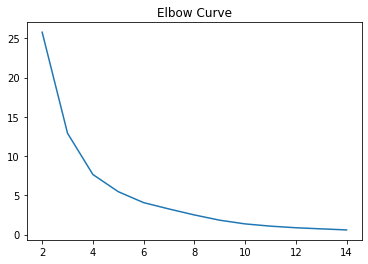

In [625]:
X =  scaled_ret_var.values #Converting ret_var into nummpy array
sse = []
for k in range(2,15):
    
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    
    sse.append(kmeans.inertia_) #SSE for each n_clusters
pl.plot(range(2,15), sse)
pl.title("Elbow Curve")
pl.show()

In [626]:
#visually looks like 5 is optimal number of clusters.
# but lets check it also with programatic way

Lets try the kneed library that finds the optimal number:

In [627]:
#pip install kneed
K = range(2,15)
from kneed import KneeLocator
kl = KneeLocator(K, sse, curve="convex", direction="decreasing")
optimal_clusters_number = kl.elbow
optimal_clusters_number

5

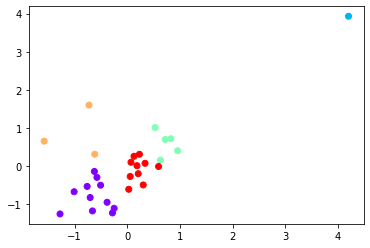

In [628]:
kmeans = KMeans(n_clusters = optimal_clusters_number).fit(X)
centroids = kmeans.cluster_centers_
pl.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap ="rainbow")
pl.show()

The silhouette method works by measuring how a particular instance is similar to the cluster it is put into. The values for this method are in a range between -1 and 1 where the higher values indicate a better match.

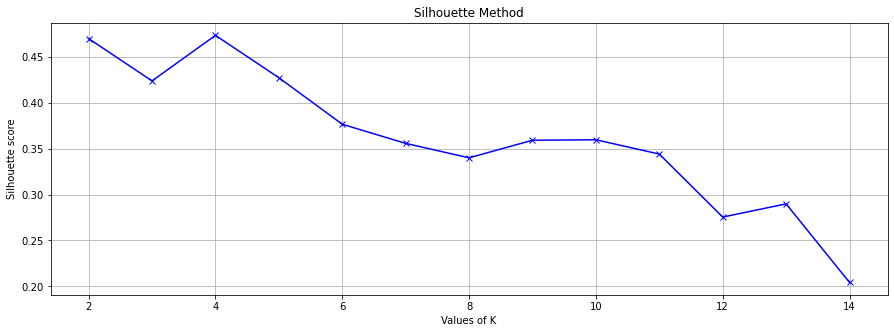

Suggested number of clusters:  3


In [629]:
from sklearn.metrics import silhouette_score

#For the silhouette method k needs to start from 2
K = range(2,15)
silhouettes = []

#Fit the method
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, init='random')
    kmeans.fit(X)
    silhouettes.append(silhouette_score(X, kmeans.labels_))

#Plot the results
fig = plt.figure(figsize= (15,5))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.grid(True)
plt.show()

kl = KneeLocator(K, silhouettes, curve="convex", direction="decreasing")
print('Suggested number of clusters: ', kl.elbow)

=> Kneed and Silhouette methods shoed different number of clusters. Since we need programatic and Kneed shows the same result as Elbow curve method showed, we will stick to Kneed tool.

In [374]:
from sklearn import metrics
print("k-Means Clustering", metrics.silhouette_score(X, kmeans.labels_, metric='euclidean'))

k-Means Clustering 0.38937651847331833


###  Hierarchical Clustering

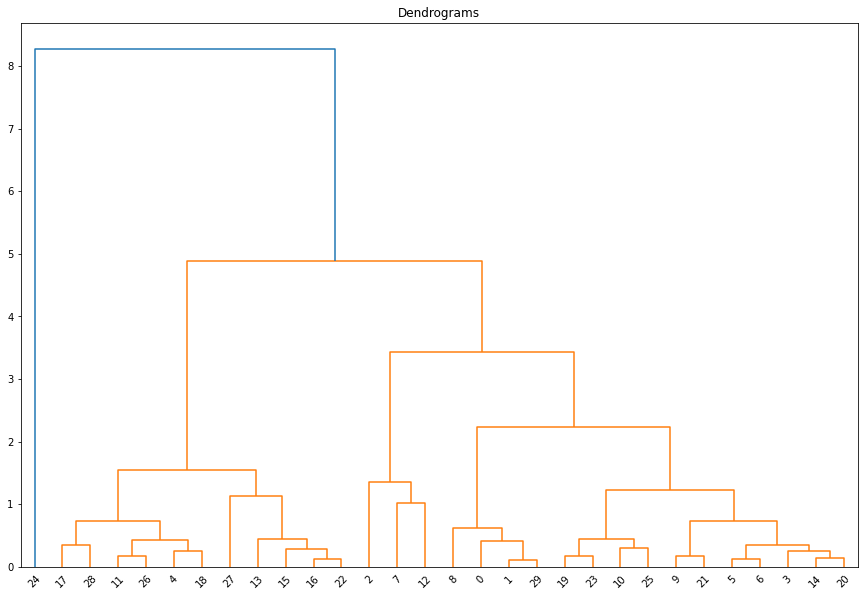

In [375]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

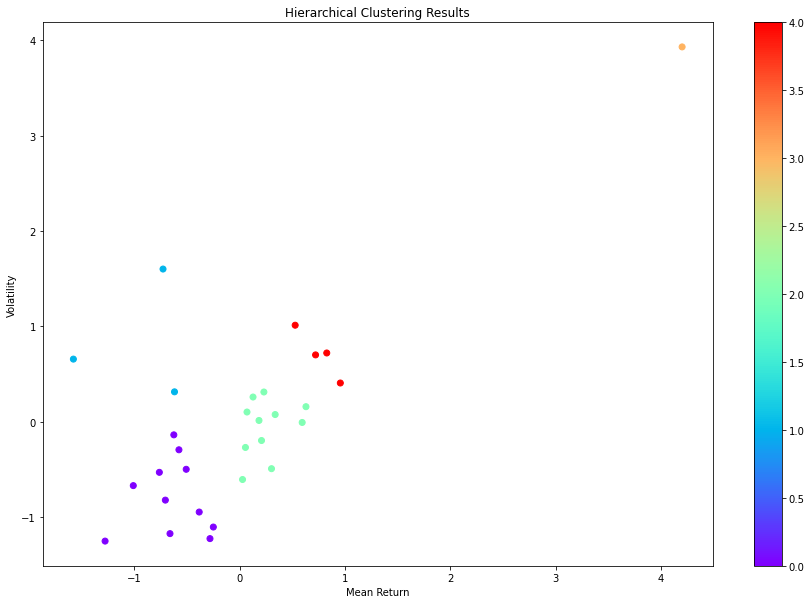

In [391]:
X =  scaled_ret_var

#Fit the model
clusters = 5
hc = AgglomerativeClustering(n_clusters= clusters, affinity='euclidean', linkage='ward')
labels = hc.fit_predict(X)

#Plot the results
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1], c=labels, cmap='rainbow')
ax.set_title('Hierarchical Clustering Results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)
plt.show()

### Affinity Propagation Clustering

/Users/katerynaisaieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


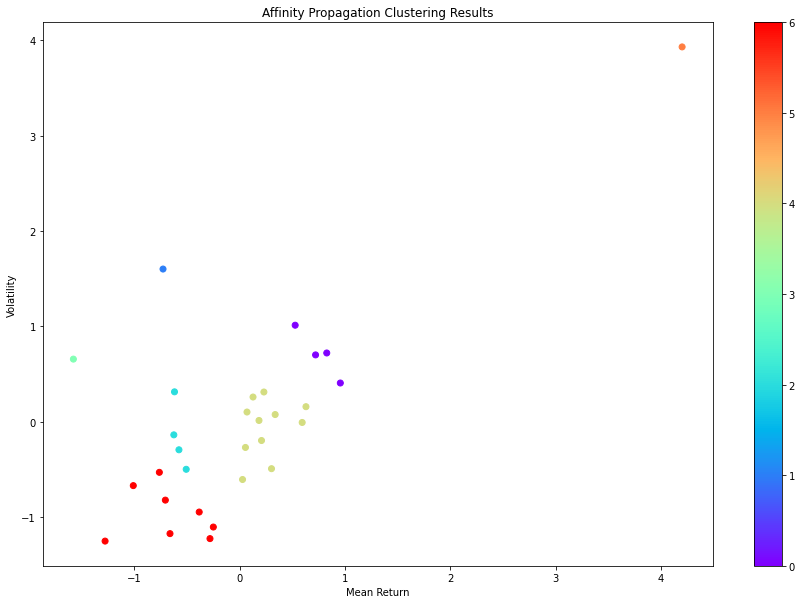

In [392]:
from sklearn.cluster import AffinityPropagation

#Fit the model
ap = AffinityPropagation()
ap.fit(X)
labels1 = ap.predict(X)

#Plot the results
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1], c=labels1, cmap='rainbow')
ax.set_title('Affinity Propagation Clustering Results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)
plt.show()

The number of clusters is: 7


<Figure size 432x288 with 0 Axes>

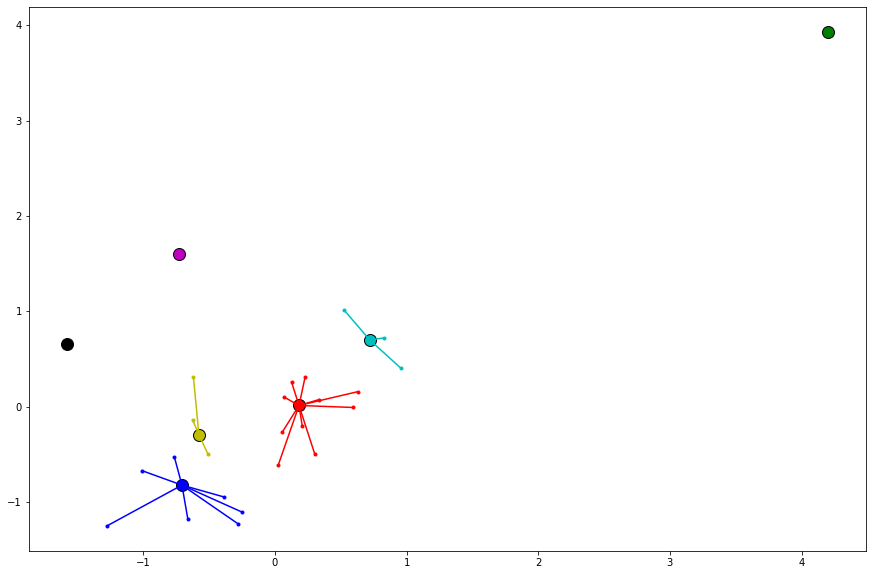

In [393]:
from itertools import cycle

#Extract the cluster centers and labels
cci = ap.cluster_centers_indices_
labels2 = ap.labels_

#Print their number
clusters = len(cci)
print('The number of clusters is:',clusters)

#Plot the results
X_ap = np.asarray(X)
plt.close('all')
plt.figure(1)
plt.clf
fig=plt.figure(figsize=(15,10))
colors = cycle('cmykrgbcmykrgbcmykrgbcmykrgb')
for k, col in zip(range(clusters),colors):
    cluster_members = labels2 == k
    cluster_center = X_ap[cci[k]]
    plt.plot(X_ap[cluster_members, 0], X_ap[cluster_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=12)
    for x in X_ap[cluster_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.show()

In [394]:
print("k-Means Clustering", metrics.silhouette_score(X, kmeans.labels_, metric='euclidean'))
print("Hierarchical Clustering", metrics.silhouette_score(X, hc.fit_predict(X), metric='euclidean'))
print("Affinity Propagation Clustering", metrics.silhouette_score(X, ap.labels_, metric='euclidean'))

k-Means Clustering 0.38937651847331833
Hierarchical Clustering 0.42717305198779554
Affinity Propagation Clustering 0.3650573675458739


## Lets try to extract the trading pairs?

In [431]:
clustered_series = pd.Series(index=X.index, data=kmeans.labels_.flatten())
clustered_series_all = pd.Series(index=X.index, data=kmeans.labels_.flatten())


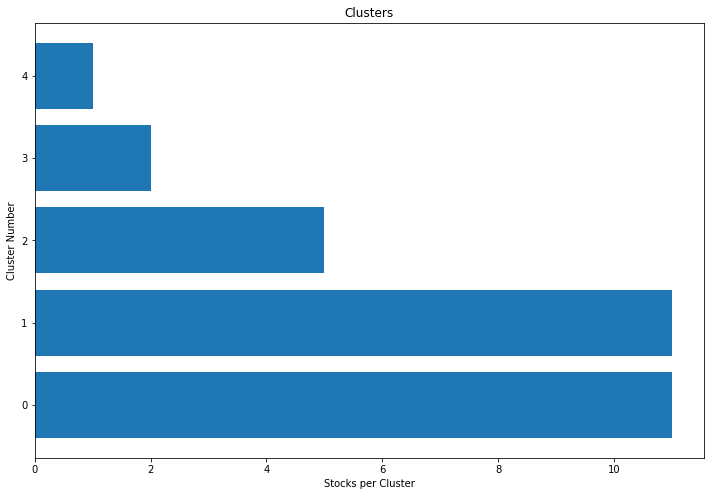

In [433]:
clustered_series = clustered_series[clustered_series != -1]
plt.figure(figsize=(12,8))
plt.barh(range(len(clustered_series.value_counts())),clustered_series.value_counts())
plt.title('Clusters')
plt.xlabel('Stocks per Cluster')
plt.ylabel('Cluster Number')
plt.show()

In [399]:
cluster_size_limit = 1000
counts = clustered_series.value_counts()
ticker_count = counts[(counts>1) & (counts<=cluster_size_limit)]
print ("Number of clusters: %d" % len(ticker_count))
print ("Number of Pairs: %d" % (ticker_count*(ticker_count-1)).sum())

Number of clusters: 4
Number of Pairs: 242


Pairs are deemed as cointegrated when they aren’t stationary and tend to move together
Let’s set up a function that finds the cointegrated pairs within a cluster. I salvaged this code from the platform known as Quantopian that’s shutdown and not in use anymore.




In [403]:
def find_cointegrated_pairs(data, significance=0.05):
    n = data.shape[1]    
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(1):
        for j in range(i+1, n):
            S1 = data[keys[i]]            
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < significance:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [409]:
ticker_count

3    11
1    11
0     5
4     2
dtype: int64

In [417]:
from statsmodels.tsa.stattools import coint

cluster_dict = {}

for i, clust in enumerate(ticker_count.index):
    tickers = clustered_series[clustered_series == clust].index
#    print(tickers)
    score_matrix, pvalue_matrix, pairs = find_cointegrated_pairs(tmp1[tickers])
    cluster_dict[clust] = {}
    cluster_dict[clust]['score_matrix'] = score_matrix
    cluster_dict[clust]['pvalue_matrix'] = pvalue_matrix
    cluster_dict[clust]['pairs'] = pairs
    
pairs = []   
for cluster in cluster_dict.keys():
    pairs.extend(cluster_dict[cluster]['pairs'])
    
print ("Number of cointegrated pairs:", len(pairs))
print ("In those pairs, we found %d unique tickers." % len(np.unique(pairs)))
print(pairs)

Number of cointegrated pairs: 0
In those pairs, we found 0 unique tickers.
[]


=> We don't have any cointegrated pairs in our dataset

### Lets pick stock from each cluster with the largest Market cap

In [542]:
df = pd.read_pickle('../data/raw_data.pkl')
df.columns[90:130]

Index(['retearn', 'revenue', 'revenueusd', 'rnd', 'roa', 'roe', 'roic', 'ros',
       'sbcomp', 'sgna', 'sharefactor', 'sharesbas', 'shareswa', 'shareswadil',
       'sps', 'tangibles', 'taxassets', 'taxexp', 'taxliabilities', 'tbvps',
       'workingcapital', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')

In [543]:
df500 = pd.read_csv('../data/SP500_list.csv',index_col=0)
df500.columns = df500.columns.str.lower()

In [544]:
df500.rename(columns={'symbol':'ticker'},inplace=True)

In [545]:
df_clustering = pd.merge(df, df500[['ticker','gics sector', 'gics sub industry']], how = 'left', left_on='ticker',right_on='ticker')
df_clustering = df_clustering.merge(clustered_tickers, how = 'left', right_on='ticker',left_on='ticker')


In [546]:
# filtering the latest date to pick company from each cluster with the lagest market cap 
temp1 = df_clustering.groupby('ticker')['reportperiod'].max()
temp1 = temp1.reset_index()


In [547]:
temp2 = temp1.merge(df_clustering, how = 'inner',left_on=['ticker','reportperiod'],right_on=['ticker','reportperiod'])

temp2[temp2.cluster==0][['ticker','reportperiod','marketcap','cluster']]
temp2 =temp2.set_index('ticker')

In [548]:
cluster_representatives  = temp2.groupby('cluster')[['marketcap']].idxmax()

## Stocks picked from each cluster

In [596]:
stocks_cluster_representatives = list(cluster_representatives.marketcap)
stocks_cluster_representatives

['AAPL', 'JNJ', 'TSLA', 'MSFT', 'INTC']

## Correlation Matrix and most Similar / non-Similar stocks

- for each stock choosen by Clustering lets add the least correlated stock.

In [440]:
df_correlation = pd.DataFrame(index = test1.columns.unique(), columns = test1.columns.unique())

In [441]:
for i in range(len(test1.columns.unique())):
    for j in range(len(test1.columns.unique())):
        ticker0 = test1.columns.unique()[i]
        ticker1 = test1.columns.unique()[j]
        cor_coeff = test1[ticker0].corr(test1[ticker1])
        df_correlation.loc[df_correlation.index==ticker0,df_correlation.columns==ticker1] = cor_coeff
        

In [442]:
np.fill_diagonal(df_correlation.values, np.NaN)

In [264]:
df_correlation.head()

ticker,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,GS,HD,IBM,INTC,JNJ,JPM,KO,MCD,MMM,MRK,MSFT,NKE,PFE,PG,TRV,TSLA,UNH,V,VZ,WMT,XOM
ticker,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAPL,NaN,0.098024,0.221644,0.016697,0.333217,0.056362,0.164781,0.158212,0.047451,0.211751,0.388596,0.090069,0.299381,0.209079,0.086631,0.19921,0.311457,0.084349,0.106761,0.679542,0.276083,0.063244,0.22863,0.135427,0.457204,0.25767,0.356713,0.038783,0.291303,0.05716
AXP,0.098024,NaN,0.590297,0.560343,0.289931,0.639344,0.494144,0.523661,0.524813,0.606806,0.120539,0.418972,0.241083,0.28256,0.752216,0.474378,0.263735,0.351189,0.114892,0.092554,0.238566,0.097929,0.023026,0.571408,0.075854,0.302267,0.529399,0.30289,0.033877,0.629429
BA,0.221644,0.590297,NaN,0.491532,0.267387,0.559503,0.464366,0.47738,0.611946,0.500829,0.151451,0.366808,0.298471,0.156372,0.543409,0.366292,0.305024,0.339481,0.078131,0.158513,0.250881,0.093273,0.022017,0.440953,0.258185,0.161909,0.388994,0.258127,0.131902,0.558217
CAT,0.016697,0.560343,0.491532,NaN,0.260667,0.581797,0.585134,0.386165,0.556316,0.563958,0.194224,0.410524,0.228105,0.260054,0.639115,0.353068,0.273569,0.522011,0.182171,-0.00611,0.18359,0.076026,0.13528,0.531994,0.06147,0.203442,0.288088,0.32236,0.166742,0.542642
CSCO,0.333217,0.289931,0.267387,0.260667,NaN,0.293165,0.361146,0.310807,0.296498,0.286631,0.320266,0.371331,0.339089,0.36438,0.281152,0.37308,0.353413,0.362269,0.149728,0.396725,0.170603,0.156443,0.312861,0.289757,0.16847,0.280389,0.362196,0.252396,0.216239,0.269231


In [551]:
least_correlated_pairs = {}
for i in range(len(test1.columns.unique())-1):
    ticker1 = df_correlation.index[i]
    min_corr = df_correlation.values[i].min()
    column_number = np.where(df_correlation.iloc[i] == min_corr)
    ticker2 = df_correlation.iloc[i].index[column_number[0][0]]
    least_correlated_pairs[ticker1] = ticker2

In [568]:
least_correlated_pairs

{'AAPL': 'CAT',
 'AXP': 'PG',
 'BA': 'PG',
 'CAT': 'MSFT',
 'CSCO': 'MRK',
 'CVX': 'MSFT',
 'DD': 'PFE',
 'DIS': 'PFE',
 'GE': 'MSFT',
 'GS': 'PFE',
 'HD': 'PFE',
 'IBM': 'TSLA',
 'INTC': 'PFE',
 'JNJ': 'TSLA',
 'JPM': 'MSFT',
 'KO': 'TSLA',
 'MCD': 'PFE',
 'MMM': 'TSLA',
 'MRK': 'TSLA',
 'MSFT': 'VZ',
 'NKE': 'PFE',
 'PFE': 'TSLA',
 'PG': 'XOM',
 'TRV': 'TSLA',
 'TSLA': 'VZ',
 'UNH': 'XOM',
 'V': 'WMT',
 'VZ': 'WMT',
 'WMT': 'XOM'}

### For each stock  cluster-represantative , lets pair it with the least correlated with them stock

In [608]:
stocks_cluster_representatives

['AAPL', 'JNJ', 'TSLA', 'MSFT', 'INTC']

In [613]:
stocks_pairs = []
for index,stock in enumerate(stocks_cluster_representatives):
    stocks_pairs.append(least_correlated_pairs[stock])
    stocks_pairs.append(stock)

In [616]:
picked_stocks_pairs = list(set(stocks_pairs))
picked_stocks_pairs

['VZ', 'TSLA', 'INTC', 'CAT', 'JNJ', 'PFE', 'AAPL', 'MSFT']